# Importing libraries and data

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings
import datetime


warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [2]:
# creating path
path = r'C:\Users\jnyam\Documents\Global Super Store'

In [3]:
df = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'Global_store_sales.csv'), index_col = False)

In [4]:
df.shape

(51290, 24)

In [5]:
df.columns

Index(['Unnamed: 0', 'row_id', 'order_id', 'order_date', 'ship_date',
       'ship_mode', 'customer_id', 'segment', 'city', 'state', 'country',
       'market', 'region', 'product_id', 'category', 'sub_category',
       'product_name', 'sales', 'quantity', 'discount', 'profit',
       'shipping_cost', 'order_priority', 'total_sales'],
      dtype='object')

In [6]:
# Checking headers
pd.options.display.max_columns = None
df.head()

,Unnamed: 0,row_id,order_id,order_date,ship_date,ship_mode,customer_id,segment,city,state,country,market,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,total_sales
0,0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Consumer,New York City,New York,United States,US,East,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical,16167.550
1,1,26341,IN-2013-77878,5/2/2013,7/2/2013,Second Class,JR-16210,Corporate,Wollongong,New South Wales,Australia,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical,33384.555
2,2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Consumer,Brisbane,Queensland,Australia,APAC,Oceania,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium,46576.539
3,3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Home Office,Berlin,Berlin,Germany,EU,Central,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium,14462.550
4,4,47221,SG-2013-4320,5/11/2013,6/11/2013,Same Day,RH-9495,Consumer,Dakar,Dakar,Senegal,Africa,Africa,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical,22663.680


# Data wrangling and cleaning


### Changing format of 'order_data' and 'ship date'

In [7]:
df['order_date'] = pd.to_datetime(df['order_date'])

In [8]:
df['ship_date'] = pd.to_datetime(df['ship_date'])

In [9]:
df.head()

,Unnamed: 0,row_id,order_id,order_date,ship_date,ship_mode,customer_id,segment,city,state,country,market,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,total_sales
0,0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Consumer,New York City,New York,United States,US,East,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical,16167.550
1,1,26341,IN-2013-77878,2013-05-02,2013-07-02,Second Class,JR-16210,Corporate,Wollongong,New South Wales,Australia,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical,33384.555
2,2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Consumer,Brisbane,Queensland,Australia,APAC,Oceania,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium,46576.539
3,3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Home Office,Berlin,Berlin,Germany,EU,Central,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium,14462.550
4,4,47221,SG-2013-4320,2013-05-11,2013-06-11,Same Day,RH-9495,Consumer,Dakar,Dakar,Senegal,Africa,Africa,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical,22663.680


In [10]:
df.to_csv(os.path.join(path, 'Data', 'Prepared Data', 'Global.csv'))

In [11]:
# Creating a new dataframe with median total_sales grouped by order_date

data = df.groupby('order_date').agg({'total_sales': ['median']})

In [12]:
data.head()

,total_sales
,median
order_date,
2011-01-01,312.789
2011-01-02,206.400
2011-01-03,325.680
2011-01-04,167.382
2011-01-06,300.390


In [13]:
data

,total_sales
,median
order_date,
2011-01-01,312.7890
2011-01-02,206.4000
2011-01-03,325.6800
2011-01-04,167.3820
2011-01-06,300.3900
...,...
2014-12-27,364.6566
2014-12-28,328.7760


In [14]:
data.columns

MultiIndex([('total_sales', 'median')],
           )

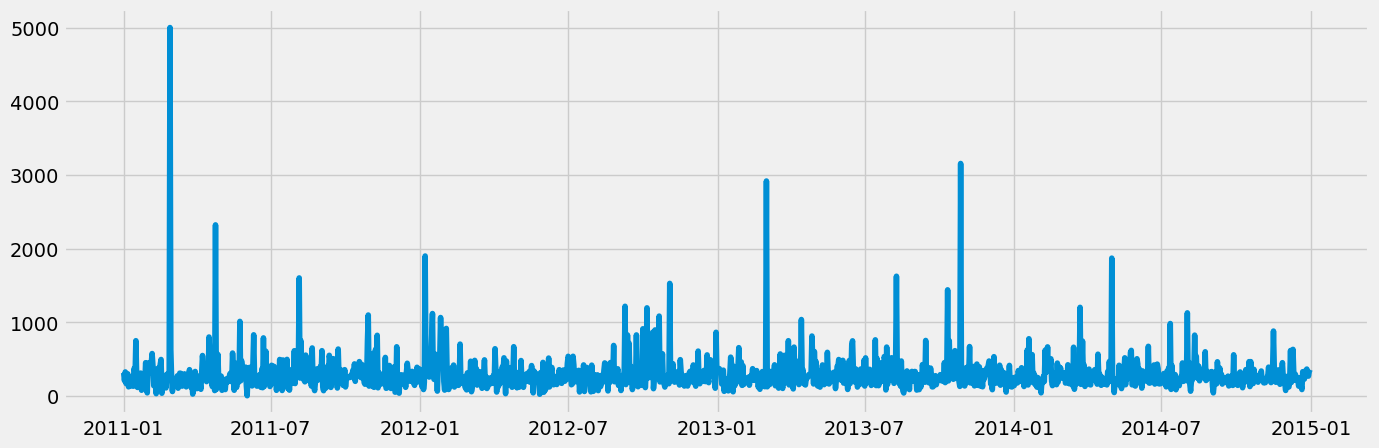

In [15]:
# Plotting the data using matplotlib

plt.figure(figsize=(15, 5), dpi=100)
plt.plot(data)

The data includes observations from 2011-2015.

# 04. Decomposing Time-Series Data

In [16]:
# Decomposing time series using 5
decomp = sm.tsa.seasonal_decompose(data, model='additive', period=50)


In [17]:
# Defining a fixed size for all special charts

from pylab import rcParams
rcParams['figure.figsize'] = 18, 7

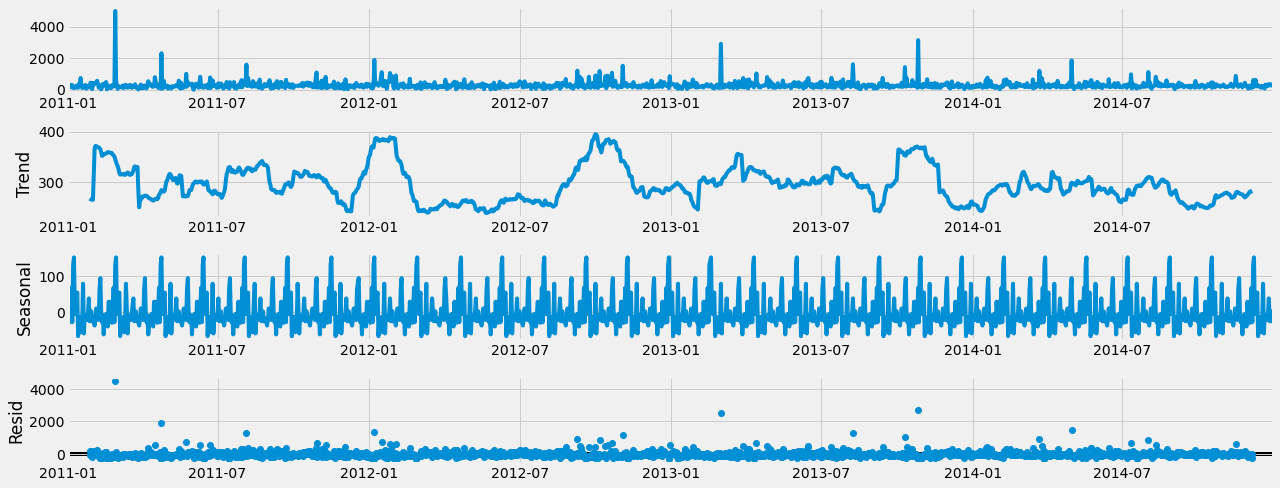

In [36]:
# Plotting decomposition of time-series data

time= decomp.plot()
plt.show()

In [37]:
time.savefig('time series data.png')

The  seasonal fluctuations represented by a spikey curve that changes at a regular interval. The trend appear the same because the data doesn't present huge variations. For a few occurrences, the residual line shows high variations.

# 05. Stationarity Test
a. Dickey-Fuller Test

In [19]:
# The adfuller() function imports from the model from statsmodels; but running it will only return an array of numbers
# This is the reason to define a function that prints the correct output from that array

# Importing the adfuller() function

from statsmodels.tsa.stattools import adfuller 

# Performing the Dickey-Fuller test:

def dickey_fuller(timeseries): # Define the function
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data['total_sales'])

Dickey-Fuller Stationarity test:
Test Statistic                  -37.951883
p-value                           0.000000
Number of Lags Used               0.000000
Number of Observations Used    1429.000000
Critical Value (1%)              -3.434934
Critical Value (5%)              -2.863565
Critical Value (10%)             -2.567848
dtype: float64


In this case, test statistic is smaller than critical value, which means that the null hypothesis can be rejected. This also means that the data is stationary. 

### b. Autocorrelation Test

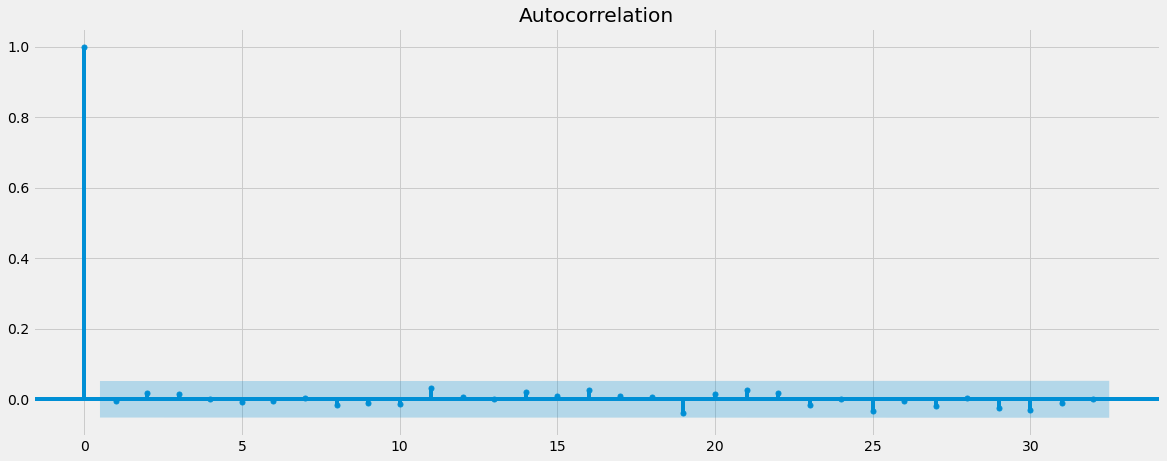

In [20]:
# Checking plot of autocorrelation

# Importing the autocorrelation and partial correlation plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(data)
plt.show()

The vertical lines signify that there are very small lags in the series. Thus, it can be concluded that the data is stationary.

# 06. Stationarizing Data


In [21]:
# Conducting the first round of differencing by subtracting the previous data point from the current data point
# The df.shift(1) function turns the observation to t-1, making the whole data t - (t -1)

data_diff = data - data.shift(1)

In [22]:
# Removing missing values as a result of differencing

data_diff.dropna(inplace = True)

In [23]:
# Checking values and headers

data_diff.head()

,total_sales
,median
order_date,
2011-01-02,-106.389
2011-01-03,119.280
2011-01-04,-158.298
2011-01-06,133.008
2011-01-07,-176.710


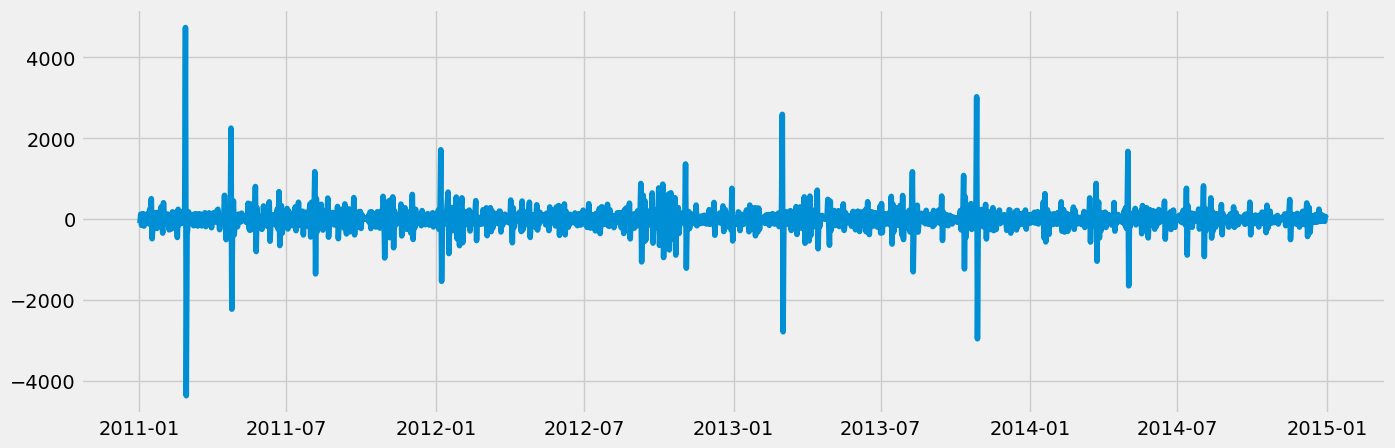

In [24]:
# Checking out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [25]:
# Re-running the Dickey-Fuller Test to check for stationarity

dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -1.450481e+01
p-value                        5.852590e-27
Number of Lags Used            2.000000e+01
Number of Observations Used    1.408000e+03
Critical Value (1%)           -3.435003e+00
Critical Value (5%)           -2.863595e+00
Critical Value (10%)          -2.567864e+00
dtype: float64


The test statistic value (-1.450481e+01) is larger than the critical value (5%) of -2.863595e+00 and the p-value is larger than 0.05. Therefore, the null hypothesis can not be rejected.

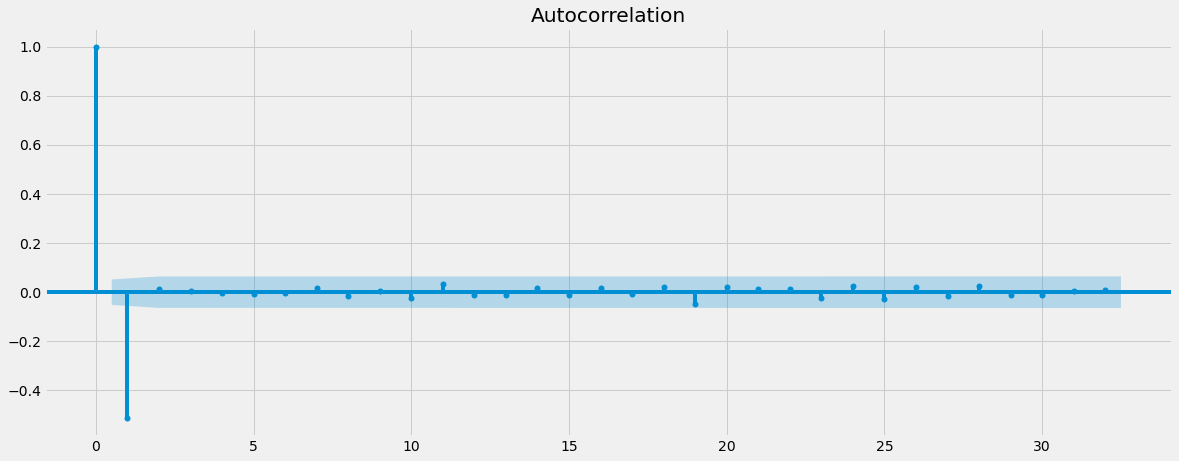

In [26]:
# Plotting the autocorrelation again

plot_acf(data_diff)
plt.show()

The stationary is strong since no vertical lines cross the confidence interval.